In [1]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', -1) 

# Load pickle files

In [2]:
PICKLE_DIR = 'pickle'

allocine_df = pd.DataFrame()

files = [file for file in os.listdir(PICKLE_DIR) if file.endswith(".pickle")]
files = sorted(files)

for file in files:
    path = os.path.join(PICKLE_DIR, file)
    print("Reading file: " + path)
    df = pd.read_pickle(path)
    allocine_df = allocine_df.append(df, ignore_index=True)
    
print()
print("Loaded {} reviews !".format(len(allocine_df)))

Reading file: pickle/allocine_0.pickle
Reading file: pickle/allocine_1.pickle
Reading file: pickle/allocine_2.pickle
Reading file: pickle/allocine_3.pickle
Reading file: pickle/allocine_4.pickle
Reading file: pickle/allocine_5.pickle
Reading file: pickle/allocine_6.pickle
Reading file: pickle/allocine_7.pickle
Reading file: pickle/allocine_8.pickle
Reading file: pickle/allocine_9.pickle

Loaded 179002 reviews !


# Explore data

In [3]:
allocine_df.sample(5, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
6675,http://www.allocine.fr/film/fichefilm-250861/critiques/spectateurs,3.0,"Les deux premiers étaient grandioses, celui-ci est grotesque. Certes, les scènes d'action sont toujours aussi réussies et dynamique, mais le final est beaucoup trop long (les combats de sabres sont interminables !), et le scénario est tout bonnement ridicule. Les dialogues sont également bien pompeux, et même si il y a un peu plus d'humour que dans les précédents, j'ai trouvé ce troisième moins ""sérieux"" que les autres, qui réussissaient à allier action et dramatique.",2019-05-29,4,1
63429,http://www.allocine.fr/film/fichefilm-226443/critiques/spectateurs,3.5,"Le polar norvégien est dans la lignée des films de Quentin Tarantino, Robert Rodriguez et Franck Miller. \nNils conducteur de chasse neige apprend que sont fils a été tué. Il décide donc de partir se faire justice lui même. \nLe scénario fonctionne sous le principe de boule de neige en effet au fur et a mesure le film s'accentue dans la violence et même l'ultra violence. Beaucoup d'humour noir qui ne laisse pas le spectateur indifférent. Un film qui change car au cinéma le genre du polar n'est pas assez représenté. Un film bien divertissant noir a ne pas regarder tout les jours.",2015-01-21,1,0
56295,http://www.allocine.fr/film/fichefilm-28540/critiques/spectateurs,4.0,"Le deuxième et troisième opus de la trilogie sont différents du premier. ""Reloaded"" est, je penses, mon préférée de la trilogie. Il y a toujours beaucoup d'action, de la bonne musique, de très bons décors et costumes et de nouveaux personnages. L'histoire reste dans la lignée du précèdent. On ne s'ennui pas. Je retiens beaucoup les nombreuses scènes de combats de ce film entre Néo et tout un groupe d'ennemis. Bref, trilogie à voir.",2013-05-11,5,2
150995,http://www.allocine.fr/film/fichefilm-192103/critiques/spectateurs,2.0,"Boarf. Si la première partie était inutile mais pas si désagréable, j'étais (inexplicablement) indulgent. Sans doute devais-je être content de voir un film au cinéma qui ne m'emmerde pas trop, après Man of Steel World War Z ou moi moche et méchant 2 ça change. Mais celui-là, il m'a saoulé. Au sens propre, en sortant de la salle j'étais comme fatigué, mais pas parce que le film m'avait retourné (comme pour l'écume des jours par exemple), mais simplement parce qu'il m'a gonflé. Même rengaine que le précédent pour le début, musique chiante qui revient à CHAQUE moment triste et qui est celle de la bande annonce. Youppii. Ce qui m'a gêné dès le début,c'est qu'on voit le nom de Raphaël Personnaz qui joue Marius, donc on sait dors et déjà que ce fameux Marius reviendra dans le film, ça casse tout d'entrée de jeu (bon en même temps c'est pas comme si on s'en doutait).Bref, là encore ça commence mal, surtout qu'on doit se taper un début assez long où on rappelle les événements précédents, où on montre TOUT. C'est assez pénible, une ellipse, j'aurais pas dit non. Surtout que là Auteuil surjoue comme un cochon, encore pire que dans la première partie vu que là il crie souvent, mais bon dieu s'il suffisait de gueuler comme un dératé. L'accent marseillais un peu à la noix ne fait que rajouter au ridicule de la situation. En fait ce film a les mêmes défauts que le premier, sauf que comme là on tombe dans le drame on se tape en plus des défauts de drame larmoyant. Entre la musique triste qui, comme je l'ai dit reviens A CHAQUE MOMENT TRISTE, les pleurnicheries dignes de Twilight 2, on est mal loti. Et puis ça reste un scénario prévisible, c'est pas vraiment la faute d'Auteuil mais bon, le coupdu fils qui revient c'est ultra prévisible, je peux vous dire exactement le plan du film où il va réapparaître, plan que je trouve du coup assez nul.Et pourtant l'intrigue en soi ne m'est pas antipathique, je trouve même quo'n pourrait faire un très beau film là-dessus. Mais voilà, Auteuil est très loin d'être un grand cinéaste, ni même un bon, en témoigne le fait qu'il ait du mal à ex

In [9]:
allocine_df.head(2)

,film-url,rating,review,date,helpful,unhelpful
0,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,4.5,"Enfin un polar à l’écran, c'est tellement rare de nos jours. Le film dispose d'une photographie, de plans, travelling vraiment léché, très bon travail. L'humour bien présent est excellent avec des répliques qui font mouche surtout dans la première moitié du film, la seconde étant plus sérieuse d'une manière générale. Scénario efficace, Edward Norton joue superbement bien comme toujours. Des morceaux de jazz percutant, un excellent film.",2019-12-06,1,0
1,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,3.5,"Inspiré du roman Motherless Brooklyn, écrit par Jonathan Lethem et sortie en octobre 1999, Edward Norton réalise un vrai polar à l'ancienne, avec ses atouts et ses faiblesses. Contrairement au livre, l'intrigue se déroule dans les années 50 et pas en 1999. Tant mieux, l'ambiance des années 50 est vraiment envoûtante, les bagnoles sont magnifiques, les costumes toujours élégants, visuellement c'est une période tellement intéressante. Edward Norton s'offre un rôle assez particulier à travers ce détective atteint du syndrome de Gilles de la Tourette. Sa prestation est d'ailleurs assez bluffante, pour avoir su rentre ce trouble crédible tout en gardant son sérieux ! Le reste du casting n'est pas en reste, avec notamment Bruce Willis, Alec Baldwin ou Willems Dafoe qui offre leurs charismes à des personnages forts. Niveau Scenario, l'enquête arrive facilement à nous captiver, même si elle piétine un moment, imposant quelques baisses de rythme. J'avoue qu'il manque peut-être aussi quelques affrontements plus musclés, un interrogatoire intense ou quelques choses dans le genre pour vraiment parfaire l'ensemble. Ces petits bémols ne gâchent cependant pas les révélations finales qui clôturent le film avec panache. Bref, on est face à un vrai polar, très bien interprété, visuellement séduisant, manquant juste un peu de poigne.",2019-12-12,0,0


Pickle files are not loaded in order.
We sort the dataframe by film id for convenience

In [6]:
# Pickle files are not loaded in order
# We sort the dataframe by film id
# TODO => don't do that. Sort path at the loading part so we don't have to do this
#allocine_df = allocine_df.sort_values("film-url")
#allocine_df = allocine_df.reset_index(drop=True)

In [8]:
#allocine_df.head(2)

## Negative reviews

We consider a review is negative when its associating rating is less than or equal to 2.0, which includes 4 categories: 0.5, 1.0, 1.5 and 2.0

In [4]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
12821,http://www.allocine.fr/film/fichefilm-254187/critiques/spectateurs,0.5,"Un navet,de pire en pire ce Seth Rogen,2 heures perdus rien que pour regarder Charlize Theron tomber amoureux de ce nabot. Elle a du avoir un très gros cachet de ce type.D'ailleurs comment peut-on appeler ce mec pour qu'il joue dans des films si n'est que son pote est producteur",2019-08-05,4,1
9277,http://www.allocine.fr/film/fichefilm-144623/critiques/spectateurs,2.0,"Certes, les Pyrénées sont de belles et hautes montagnes, majestueuses et attirantes. Elles constituaient un décor idéal pour ce film où l'enjeu est du genre fantastique. La figure du fantôme, source de frisson et donc de plaisir, a un pouvoir d'attraction universel car elle découle du mystère insondable qu'est la vie après la mort. Hélas, ""les envoutés"", film d'atmosphère, ne m'a décidément pas envoutée. Si Nicolas Duvauchelle est toujours excellent, la belle Sara Giraudeau, fille de B. dont elle a les beaux yeux, semble planer et s'ennuyer fermement. Et on finit par partager son ennui. Car le rythme est lent, les dialogues monotones, on ne croit pas à l'intrigue, et on décroche. Bref, j'aurais aimé un minimum d'émotions mais ce film n'a pas eu le pouvoir de me fasciner.",2019-12-15,1,0
102049,http://www.allocine.fr/film/fichefilm-128866/critiques/spectateurs,2.0,"Film d'action pur et dur avec de bonnes idées, des moments sympa, de bons acteurs mais une réalisation assez calamiteuse qui fait qu'au bout du compte la pilule passe assez mal. En effet, les mouvements de caméra sont à la limite du supportable (plus que Bourne 3, c'est pour dire), l'image bouge dans tous les sens, c'est désagréable. De bonnes idées avec le jeu ""Société"" (ça donne envie...), le jeu d'acteur n'est clairement pas mauvais mais les personnages et leurs histoires ne sont pas du tout travaillés en plus d'être très stéréotypés. Dommage car avec un scénario de base intéressant mieux exploité, ce film aurait pu être bien meilleur.",2010-01-29,3,0


## Positive reviews

We consider a review is positive when its associating rating is greater than or equal to to 4.0, which includes 3 categories: 4.0, 4.5 and 5.0

In [5]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
83302,http://www.allocine.fr/film/fichefilm-18524/critiques/spectateurs,5.0,"Excellent Film. Le Réalisateur Martin Campbell livre une adaptation Épique et Moderne du justicier masquer connu sous le nom de Zorro. Pour Commencer le Scénario est Passionnant tout en réservant son lot de Rebondissements en passant par une Magnifique reconstitution du 19 eme siècle avec des Costumes ainsi que des Décors de toute beauté.Ensuite la BO de John Horner est envoûtante tout comme la Musique du Générique de fin composer par le duo Tina Arena et Marc Anthony,ajouter a cela une Réalisation impeccable qui est riches en Courses Poursuites endiablés accompagnée de Combats a l' Épée Flamboyante dont la Chorégraphie est maîtriser a la perfection sans oublier quelques Séquences d'Actions Spectaculaires ainsi qu'une touche d'Humour et de Passion pour pimenter le tout grâce a un Rythme Trépidant qui parvient a maintenir en haleine pendant ces 2h20. Enfin la Distribution est quand a elle Splendide avec en tête l'acteur Antonio Bandéras qui campe avec brio un jeune Zorro a la fois Séducteur et Fougueux,a ses cotés on retrouve l'excellent Anthony Hopkins qui est parfait dans le rôle de son Mentor qui était l'ancien Zorro et qui cherche sa soif de Vengeance, ajouter a cela la ravissante Catherine Zeta Jones qui livre une prestation pleine de charme et pour finir les Stuart Wilson et Matt Letscher campent des Adversaires très Convaincants a l'écran. En Conclusion, Le Masque de Zorro est un film D'Aventures a la fois Spectaculaire,Drole et Romantique qui est un grand moment de cinéma tout en parvenant a donner ses lettres de noblesses aux légendaires films de Capes et D’Épées.",2015-05-15,4,2
26033,http://www.allocine.fr/film/fichefilm-246284/critiques/spectateurs,4.5,Le synopsis fait par Allociné résume parfaitement ce film.\nC'est vraiment un film remarquable et passionnant.\nL'acteur principal est magistral dans ce rôle là.\nA noter la scène dans le métro qui est extra.,2018-01-04,8,8
150927,http://www.allocine.fr/film/fichefilm-25861/critiques/spectateurs,4.0,On avait plus vu Madonna dans un rôle aussi marquant depuis who's that girl. Ce film est fabuleux et le récit une pure merveille.\r\nDe belle chanson viennent couronner le tout et cette histoire devient une ôde à l'argentine.,2008-04-11,1,1


# TODO

In [7]:
sns.set(style="whitegrid")

## Rating counts

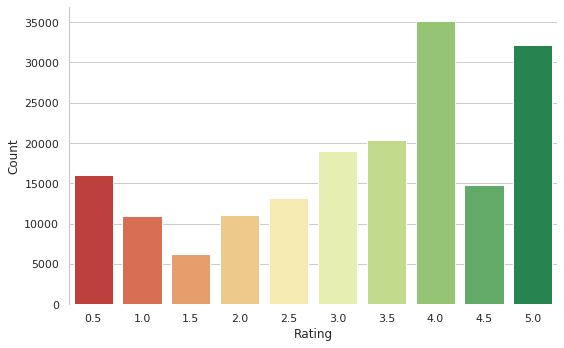

In [8]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='Count')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/rating_counts.png', dpi=200)

## Polarity

In [65]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

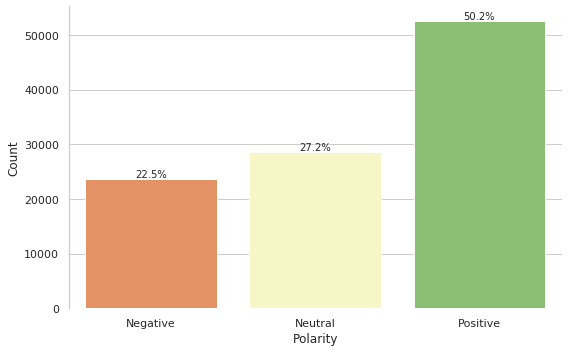

In [66]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='Polarity', ylabel='Count')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/polarity_frequency.png', dpi=200)

## Reviews per year

In [74]:
allocine_df['date'] = pd.to_datetime(allocine_df['date'])
reviews_per_year = allocine_df.groupby(allocine_df['date'].dt.year).size()

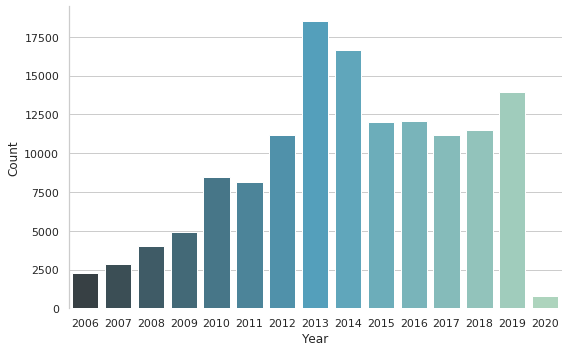

In [75]:
plt.figure(figsize=(8,5))
ax = sns.barplot(reviews_per_year.index, reviews_per_year.values, palette="GnBu_d")
ax.set(xlabel='Year', ylabel='Count')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_per_year.png', dpi=200)

## Reviews length

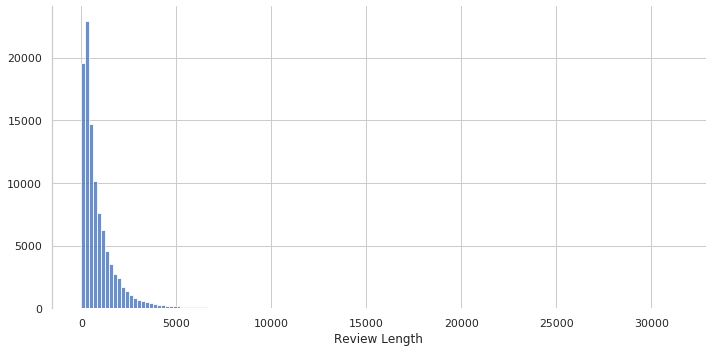

In [69]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_length.png', dpi=200)

In [70]:
THRESHOLD = 4000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

2495 reviews with LEN > 4000 (2.38 % of total data)


Example of a long review

In [25]:
long_reviews.head(1)

film-url  \
12  http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs   

    rating  \
12  3.5      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

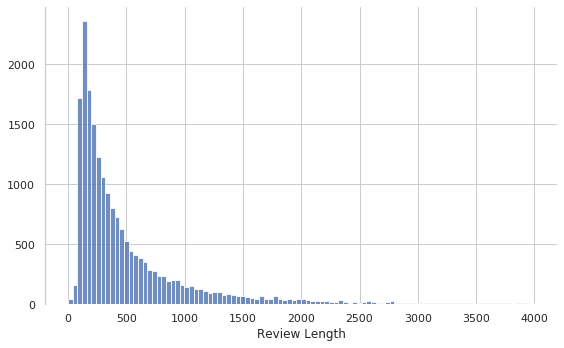

In [26]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/short_reviews_length.png', dpi=200)

In [ ]:
# TODO: other analysis ?
# Histograms of reviews lengths for each rating (negative reviews are shorter ?)

In [ ]:
# Num reviews per film ? => why are we limiting to 30 reviews per film ?

# Build dataset

In [32]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 19782


## Remove data we don't need 

In [33]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [34]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 4000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 15508 (-21.6 %)
Length: 15333 (-1.1 %)
Length: 1214 (-92.1 %)
Total loss: (-93.9 %)


In [35]:
dataset_df.groupby('polarity').size()

polarity
-1    320
 1    894
dtype: int64

## Clean review text

In [36]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

In [37]:
dataset_df.sample(5, random_state=42)

,film-url,review,polarity
6195,http://www.allocine.fr/film/fichefilm-255238/critiques/spectateurs,"Film très spécial et pourtant, l'univers du film, la dureté du film, enfin tout est captivant et pourtant je suis pas fan de ce type de film d'auteur... comme quoi tout est possible. A voir sans hesiter",1
12194,http://www.allocine.fr/film/fichefilm-262099/critiques/spectateurs,"Présenté en compétition au Festival de Cannes 2019, « Le Lac aux Oies Sauvages » nous plonge en Chine dans la cavale d’un gangster ennemi de tous. Dans une ambiance nocturne et pluvieuse, il tombera amoureux d’une baigneuse, c’est-à-dire une prostituée qui souhaite s’échapper de son malheureux sort. Le film est très violent et le travail sur les sons et les plans sont étonnants. Mais le film est également très romantique et la photographie valorise la femme avec un style presque céleste. « Le Lac aux Oies Sauvages » est un polar envoûtant grâce à une mise en scène et un esthétisme irréprochable et ce, malgré la complexité de l’intrigue. D'autres critiques sur notre page Facebook : Cinéphiles 44 et notre site cinephiles44.com",1
12911,http://www.allocine.fr/film/fichefilm-262485/critiques/spectateurs,"Chanceux ceux qui n'ont pas encore cette merveille ! Les images sont splendides et donnent sens à cette question essentielle : quelle place sommes nous prêts à laisser au sauvage pour assurer notre équilibre ? avec respect et intelligence. Simple, pur, profond ce film de jean Michel BERTRAND nous ouvre les yeux sur la magie de notre monde.",1
12622,http://www.allocine.fr/film/fichefilm-262396/critiques/spectateurs,"Très bon biopic, rythmé, prenant, et les 2:30 passent vite. Bien que je n'aime pas les courses de Nascar, les scènes de courses automobiles sont bien tournées et on rentre dans l'action. On voit dans le film un Henri Ford (le second) pas commode du tout et limite imbuvable mais changeant d'un seul coup dans la scène où il s'effondre dans la GT40: excellent. Du bon ciné musclé dans une ambiance bien recréée des années 1960.",1
15602,http://www.allocine.fr/film/fichefilm-270440/critiques/spectateurs,"Je conseil a tout le monde d'aller le voir!!! Personnage attachant bien que certains pas assez détaillés , histoire bien amené sur le climat sans trop en faire , pm= petit message pour Libération critique non constructive c'est dégueulasse de mettre une étoile Même si vous aimez pas . Aller voir leur critique",1


## Balance classes

In [43]:
# The overall distribution of labels is balanced (25k pos and 25k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = 300
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

In [45]:
print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=42)

polarity
-1    300
 1    300
dtype: int64


,film-url,review,polarity
12317,http://www.allocine.fr/film/fichefilm-262124/critiques/spectateurs,Magnifique encore mieux que le precedent et toujour le meme humour une belle réussite encore je me suis bien amusée !!!,1
12959,http://www.allocine.fr/film/fichefilm-263312/critiques/spectateurs,"Voici un polar roumain bien tordu, entre Roumanie, la Gomera aux Canaries et pour le final Singapour. Un flic piégé par la pègre, une femme ultra fatale, une procureure psychorigide, une intrigue complètement azimutée, un langage sifflé en trois langues, ajoutez en plus trois phases temporelles bien mélangées et chapitré par personnage, et vous obtenez une recette de polar absolument unique.",1
13575,http://www.allocine.fr/film/fichefilm-264228/critiques/spectateurs,"Très bon film je recommande, moment agréable à passer seul ou à plusieurs, histoire immersive, touchante. Beaucoup à dire. Mais encore !",1
14386,http://www.allocine.fr/film/fichefilm-266409/critiques/spectateurs,"Ah la bien pensance en une scéance ... Quand c'est bien traité, avec humour, positivisme, sous un fond de psychologie ""vraie"" pourquoi pas mais là le sujet est survolé. Pas vraiment du cinéma",-1
14382,http://www.allocine.fr/film/fichefilm-266409/critiques/spectateurs,"Je ne recommande à personne d’aller voir ce film. Un ramassis de clichés sur les jeunes de cités. Pendant toute la durée du film on voit Amel, Yanis, Farid... faire des bêtises et être en échec scolaire. C’est une honte qu’en 2019, au cinéma, on se permette de montrer encore cette image des jeunes de cités, comme étant des débiles incapables de s’en sortir. Je suis d’autant plus déçue que Grand Corps Malade ait participé à la réalisation de ce film. Parlons aussi de la « morale » de ce film, et de la représentation des classes segpa. Alors d’apres ce film ces classes sont pour les « débiles » et les fauteurs de troubles. Pourtant ces classes permettent réellement à certains enfants de rattraper leur retard et de poursuivre les études de leurs choix à leurs rythmes, et adaptées à leurs profils. Parce que non en segpa on ne fait pas du repassage et de la couture et qu’on peut vivre en cité,banlieue, tout en étant cultivé et en ayant soif d’apprendre.",-1
15193,http://www.allocine.fr/film/fichefilm-267581/critiques/spectateurs,"Le réalisateur Maxime Giroux retrouve son alter-ego Martin Dubreuil pour une conquête de l'ouest atemporelle et envoûtante : paysages grandioses et cadres resserrés en clair-obscur, galerie de personnages inquiétants et fascinants (Romain Duris, Reda Kateb, Soko, Sarah Gadon...), habile mélange des genres... Tout est réuni pour faire vivre au spectateur une expérience intellectuelle et sensorielle dont il se souviendra longtemps.",1
2784,http://www.allocine.fr/film/fichefilm-215094/critiques/spectateurs,"Une déplorable pauvreté linguistique, des décors sans intérêt, l’antre depapi palpatine et déjà vue mille fois et jamais appréciée, une grotte, des pics et un fauteuil roulant télescopique, ça n’a rien de captivant. Pour ce qui est des « dialogues », étant lycéen, j’aurais pu poser mon bon micro à n’importe quelle table de la cantine pour les créer, rendant ce filme encore plus déprimant. Des incohérences à foison : d’où sort le margoulin dans le faucon millenium au début du filme ? Il dit un mot puis disparaît jusqu’à l’une des dernières scènes. La mort du général espion vaut-elle la peine d’être commentée ? Kylo Ren qui prend le collier de Rey par télépathie ? Suivi d’un « attends, j’arrive »? Leur cailloux à la qui les mènent à leur planète ? Je regrette mais pas d’arkenstone dans Star Wars, c’est sensé être un filme de science fiction. Les croiseurs qui sortent de terre ? Les méchants TOUJOURS associés à la pluie, le gris et le noir, même pas un peu de feu, dans une grotte bien sûr sinon ça devient trop dur à comprendre.C’est au jeu d’acteur de Poe Dameron avec ses mimiques que je donne ces 0,5. C’est une honte. On se prend une avalanche d’effets spéciaux et de dialogues PA

In [119]:
# split train / test
# While True
# 1. random in train_set ids => find corresponding row
# 2. add all rows with same film id test_set
# 3. is test_proportion reached ? Yes: STOP, No continue

# => verify this split preserve the balanced distribution of classes